In [1]:
#airplane prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
data.head(10)

,Id,inspectionScore,maneuverabilityScore,maintananceConcerns,weatherSeverityScore,temperature,safetyCheckFailures,galeStrength,lastInspected,incidentCode,incidentID,maxCruisingElevation,scaleOfIncident
0,0,16.301370,59.161349,17,0.129040,79.66,3,0.298803,16,3,10888,26116.134006,catastrophic
1,1,18.310502,62.534184,8,0.003186,78.00,1,0.288345,16,7,587,36059.221584,catastrophic
2,2,25.662100,70.738377,10,0.064877,79.17,2,0.207206,14,4,4574,35594.722894,catastrophic
3,3,37.488584,66.636281,7,0.003557,81.56,2,0.295558,14,6,12044,14871.664920,medium
4,4,58.401826,71.741112,4,0.356823,79.31,2,0.362273,11,2,8948,26391.631688,low
5,5,53.926941,69.644485,11,0.558462,85.08,2,0.474426,12,2,3622,41597.930434,low
6,6,49.771689,37.648131,6,0.086740,84.87,2,0.542583,14,4,12262,47124.241111,low
7,7,34.063927,62.351869,1,0.066496,77.36,2,0.339193,15,4,1717,36420.956297,medium
8,8,21.917808,62.807657,13,0.147082,79.40,2,0.330899,18,3,4425,29457.131416,medium
9,9,45.570776,48.541477,17,1.451384,79.45,3,0.514094,8,1,4347,39029.733563,high


In [5]:
data.describe()

,Id,inspectionScore,maneuverabilityScore,maintananceConcerns,weatherSeverityScore,temperature,safetyCheckFailures,galeStrength,lastInspected,incidentCode,incidentID,maxCruisingElevation
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4499.500000,41.845718,65.153287,6.577444,0.256260,79.965202,2.011444,0.381305,12.949444,3.817444,6251.004000,32018.638334
std,2598.220545,16.144070,11.864675,6.960863,0.381550,2.763950,1.042695,0.121226,3.543108,1.907025,3610.759895,9439.873572
min,0.000000,0.000000,0.000000,0.000000,0.000316,74.740000,0.000000,0.134000,1.000000,1.000000,2.000000,831.695553
25%,2249.750000,30.456621,56.973564,2.000000,0.011668,77.950000,1.000000,0.293394,11.000000,2.000000,3130.750000,25739.384677
50%,4499.500000,41.187215,65.587967,4.000000,0.074378,79.530000,2.000000,0.365518,13.000000,4.000000,6238.500000,32108.894454
75%,6749.250000,52.465753,73.336372,9.000000,0.355283,81.570000,3.000000,0.451346,15.000000,6.000000,9394.500000,38399.455105
max,8999.000000,100.000000,100.000000,54.000000,2.365378,97.510000,5.000000,0.882648,23.000000,7.000000,12500.000000,64297.651218


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    9000 non-null   int64  
 1   inspectionScore       9000 non-null   float64
 2   maneuverabilityScore  9000 non-null   float64
 3   maintananceConcerns   9000 non-null   int64  
 4   weatherSeverityScore  9000 non-null   float64
 5   temperature           9000 non-null   float64
 6   safetyCheckFailures   9000 non-null   int64  
 7   galeStrength          9000 non-null   float64
 8   lastInspected         9000 non-null   int64  
 9   incidentCode          9000 non-null   int64  
 10  incidentID            9000 non-null   int64  
 11  maxCruisingElevation  9000 non-null   float64
 12  scaleOfIncident       9000 non-null   object 
dtypes: float64(6), int64(6), object(1)
memory usage: 914.2+ KB


In [7]:
data.isnull().sum()

Id                      0
inspectionScore         0
maneuverabilityScore    0
maintananceConcerns     0
weatherSeverityScore    0
temperature             0
safetyCheckFailures     0
galeStrength            0
lastInspected           0
incidentCode            0
incidentID              0
maxCruisingElevation    0
scaleOfIncident         0
dtype: int64

In [8]:
#that's good, we don't have any null values

In [9]:
np.unique(data['scaleOfIncident'])

array(['catastrophic', 'high', 'low', 'medium'], dtype=object)

In [10]:
#we can see there are mainly 4 categories of accident.

In [11]:
data['scaleOfIncident'].value_counts()

catastrophic    2754
medium          2472
low             2267
high            1507
Name: scaleOfIncident, dtype: int64

<AxesSubplot:xlabel='scaleOfIncident', ylabel='count'>

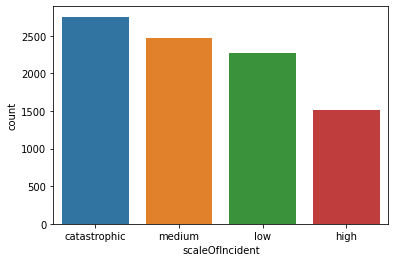

In [12]:
sns.countplot(data=data, x='scaleOfIncident')

<AxesSubplot:xlabel='inspectionScore', ylabel='Density'>

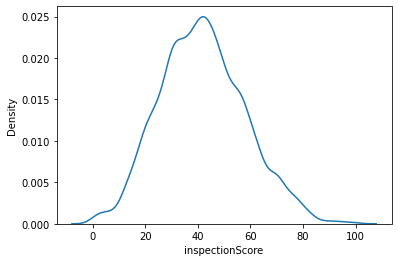

In [13]:
sns.kdeplot(data['inspectionScore'])

In [14]:
#most of the airplanes that crashed had a safety factory of even less than 50%

<AxesSubplot:xlabel='maneuverabilityScore', ylabel='Density'>

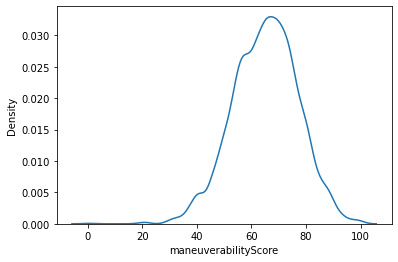

In [15]:
sns.kdeplot(data['maneuverabilityScore'])

In [16]:
#most of the pilots had a control of 70% during the accident, which is not that bad

<AxesSubplot:xlabel='maintananceConcerns', ylabel='Density'>

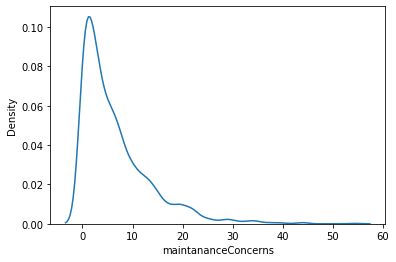

In [17]:
sns.kdeplot(data['maintananceConcerns'])

In [18]:
#almost all the airplanes had maintanance concerns of even less than 5, which is very good, however few of 
#them also had a high maintanance concerns

<AxesSubplot:xlabel='weatherSeverityScore', ylabel='Density'>

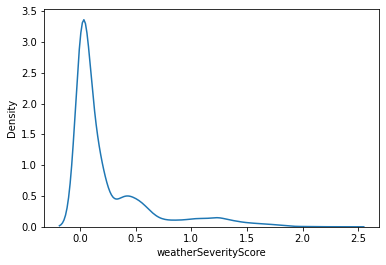

In [19]:
sns.kdeplot(data['weatherSeverityScore'])

<AxesSubplot:xlabel='temperature', ylabel='Density'>

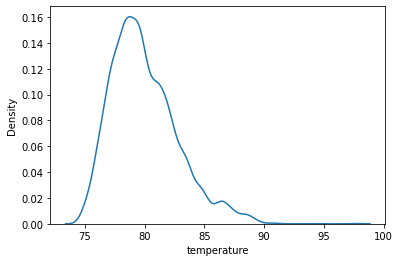

In [20]:
sns.kdeplot(data['temperature'])

In [21]:
np.unique(data['safetyCheckFailures'])

array([0, 1, 2, 3, 4, 5], dtype=int64)

<AxesSubplot:xlabel='safetyCheckFailures', ylabel='count'>

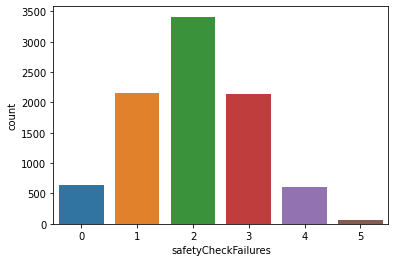

In [22]:
sns.countplot(data=data, x='safetyCheckFailures')

<AxesSubplot:xlabel='galeStrength', ylabel='Density'>

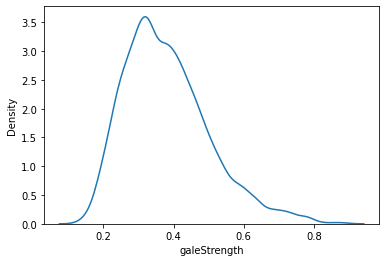

In [23]:
sns.kdeplot(data['galeStrength'])

<AxesSubplot:xlabel='lastInspected', ylabel='Density'>

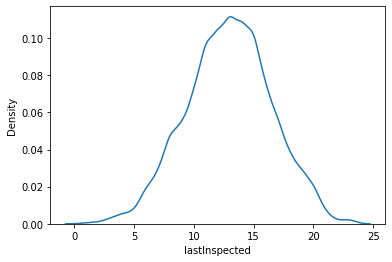

In [24]:
sns.kdeplot(data['lastInspected'])

In [25]:
#planes which were inspected, before more that 10 days, experienced most accidents

<AxesSubplot:xlabel='incidentCode', ylabel='count'>

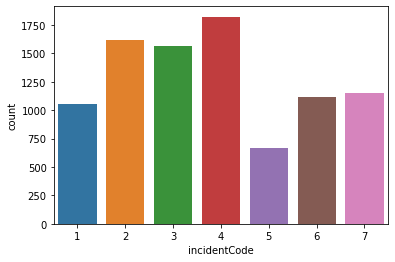

In [26]:
sns.countplot(data=data, x='incidentCode')

<AxesSubplot:xlabel='maxCruisingElevation', ylabel='Density'>

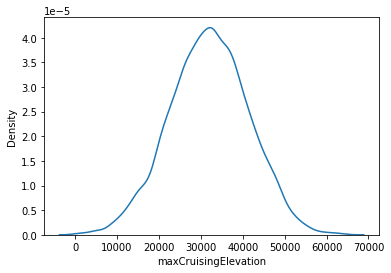

In [27]:
sns.kdeplot(data['maxCruisingElevation'])

In [28]:
#we do not need incident ID and id

In [29]:
data.drop(columns=['incidentID','Id'],axis=1, inplace=True)

In [30]:
data.columns

Index(['inspectionScore', 'maneuverabilityScore', 'maintananceConcerns',
       'weatherSeverityScore', 'temperature', 'safetyCheckFailures',
       'galeStrength', 'lastInspected', 'incidentCode', 'maxCruisingElevation',
       'scaleOfIncident'],
      dtype='object')

<AxesSubplot:xlabel='scaleOfIncident', ylabel='safetyCheckFailures'>

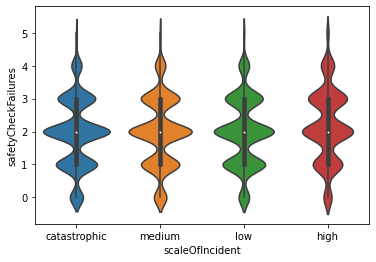

In [31]:
sns.violinplot(data=data, x='scaleOfIncident', y='safetyCheckFailures')

In [32]:
data.groupby('scaleOfIncident')['safetyCheckFailures'].value_counts()

scaleOfIncident  safetyCheckFailures
catastrophic     2                      1083
                 1                       668
                 3                       612
                 0                       214
                 4                       165
                 5                        12
high             2                       538
                 3                       411
                 1                       312
                 4                       140
                 0                        85
                 5                        21
low              2                       838
                 1                       595
                 3                       528
                 0                       147
                 4                       147
                 5                        12
medium           2                       952
                 3                       583
                 1                       578
                 0

In [33]:
#it is evident that in all the type of the accident that occured had 2 components failed in most of them.

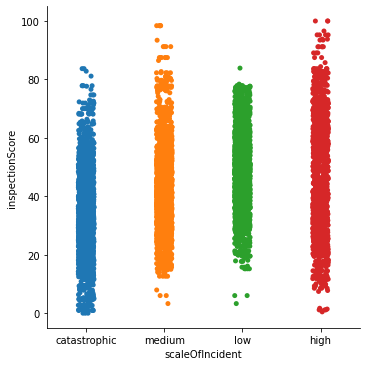

In [34]:
sns.catplot(data=data, x='scaleOfIncident', y='inspectionScore')

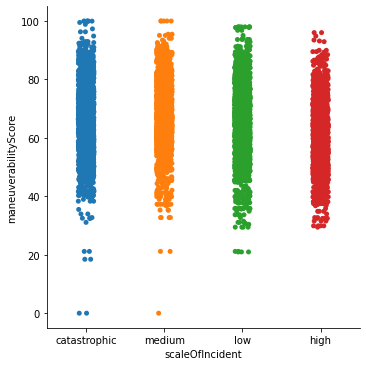

In [35]:
sns.catplot(data=data, x='scaleOfIncident', y='maneuverabilityScore')

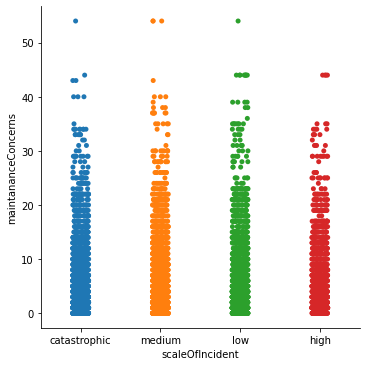

In [36]:
sns.catplot(data=data, x='scaleOfIncident', y='maintananceConcerns')

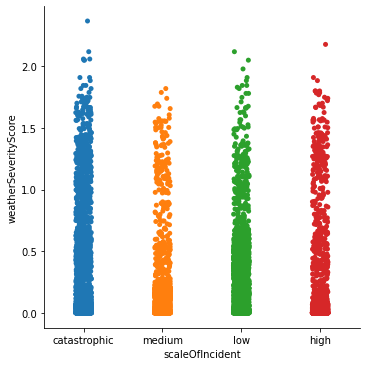

In [37]:
sns.catplot(data=data, x='scaleOfIncident', y='weatherSeverityScore')

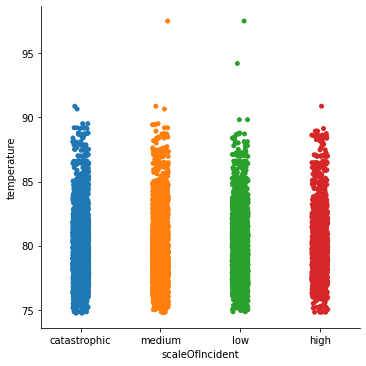

In [38]:
sns.catplot(data=data, x='scaleOfIncident', y='temperature')

In [39]:
data['scaleOfIncident']=data['scaleOfIncident'].apply(lambda x: 1 if x=='low' else(2 if x=='medium' else(3 if x=='high' else 4)))

In [40]:
data['scaleOfIncident'].value_counts()

4    2754
2    2472
1    2267
3    1507
Name: scaleOfIncident, dtype: int64

In [41]:
#grouping last inspected
data['lastInspectedGroup'] = data['lastInspected'].apply(lambda x: (x//5) if(x%5==0) else (x//5)+1)

In [42]:
data['lastInspectedGroup'].value_counts()

3    4778
2    1994
4    1983
1     149
5      96
Name: lastInspectedGroup, dtype: int64

<AxesSubplot:xlabel='lastInspectedGroup', ylabel='count'>

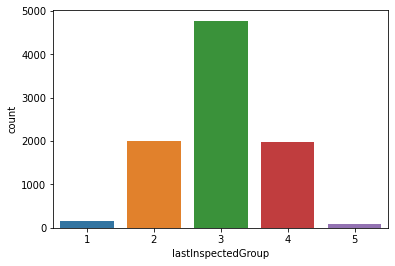

In [43]:
sns.countplot(data=data, x='lastInspectedGroup')

In [44]:
#so we can conclude that most of the accidents that occured, happened between 15-20 days of last inspected

In [45]:
data.drop(columns='lastInspected',axis=1, inplace=True)

In [46]:
data.columns

Index(['inspectionScore', 'maneuverabilityScore', 'maintananceConcerns',
       'weatherSeverityScore', 'temperature', 'safetyCheckFailures',
       'galeStrength', 'incidentCode', 'maxCruisingElevation',
       'scaleOfIncident', 'lastInspectedGroup'],
      dtype='object')

In [47]:
data['maintananceConcernGroup'] = data['maintananceConcerns'].apply(lambda x: 5 if(x>20) else(x//5 if(x%5==0 and x!= 0) else (x//5)+1))

In [48]:
data['maintananceConcernGroup'].value_counts()

1    5097
2    1977
3    1015
4     457
5     454
Name: maintananceConcernGroup, dtype: int64

In [49]:
data.drop(columns='maintananceConcerns',axis=1, inplace=True)

In [50]:
#to deal with skewness, certain operations is performed

def masterplot(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col])
    
def log_master(data,col):
    data = data[data[col]>0]
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.log(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.log(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.log(data[col]))
    
def reciprocal_master(data,col):
    data = data[data[col]>0]
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(1/data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(1/data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=1/data[col])
    

def squareroot_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.sqrt(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.sqrt(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.sqrt(data[col]))

C:\Users\KIIT\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


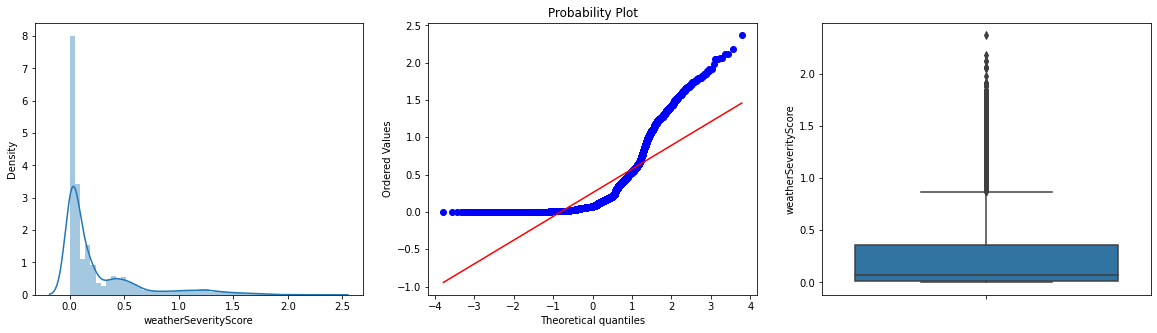

In [51]:
#before applying any scaling
masterplot(data,'weatherSeverityScore')

C:\Users\KIIT\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


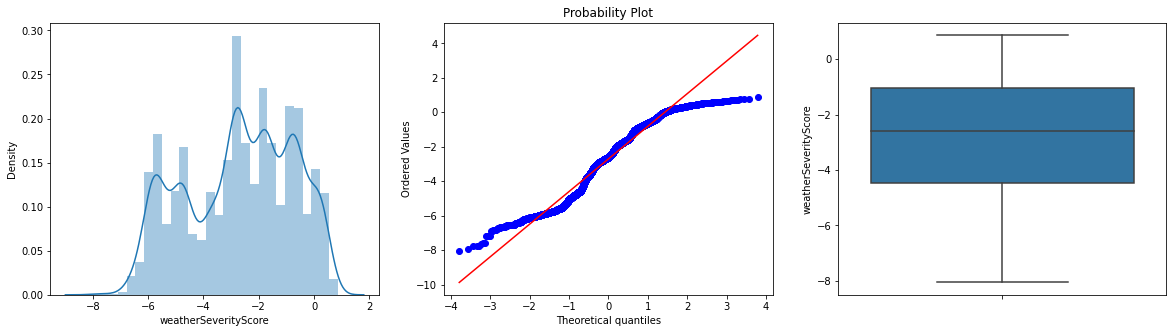

In [52]:
#after applying scaling
log_master(data,'weatherSeverityScore')

In [53]:
#tranforming the data
data['weatherSeverityScore'] = np.log(data['weatherSeverityScore'])

In [54]:
data.head(10)

,inspectionScore,maneuverabilityScore,weatherSeverityScore,temperature,safetyCheckFailures,galeStrength,incidentCode,maxCruisingElevation,scaleOfIncident,lastInspectedGroup,maintananceConcernGroup
0,16.301370,59.161349,-2.047635,79.66,3,0.298803,3,26116.134006,4,4,4
1,18.310502,62.534184,-5.749121,78.00,1,0.288345,7,36059.221584,4,4,2
2,25.662100,70.738377,-2.735255,79.17,2,0.207206,4,35594.722894,4,3,2
3,37.488584,66.636281,-5.638872,81.56,2,0.295558,6,14871.664920,2,3,2
4,58.401826,71.741112,-1.030516,79.31,2,0.362273,2,26391.631688,1,3,1
5,53.926941,69.644485,-0.582568,85.08,2,0.474426,2,41597.930434,1,3,3
6,49.771689,37.648131,-2.444835,84.87,2,0.542583,4,47124.241111,1,3,2
7,34.063927,62.351869,-2.710608,77.36,2,0.339193,4,36420.956297,2,3,1
8,21.917808,62.807657,-1.916762,79.40,2,0.330899,3,29457.131416,2,4,3
9,45.570776,48.541477,0.372517,79.45,3,0.514094,1,39029.733563,3,2,4


In [55]:
#dividing data into target and non-target values
X = data.drop(columns='scaleOfIncident', axis=1)
y = data['scaleOfIncident'].values

In [56]:
#splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [57]:
#we do not need to scale the data, since we are applying tree based algorithm
#applying tree based algorithms first

In [58]:
rfclassifier = RandomForestClassifier(n_estimators=100,bootstrap=True,n_jobs=-1, random_state=0)
rfclassifier.fit(X_train, y_train)
yrf_pred = rfclassifier.predict(X_test)

In [59]:
f1_score(y_test,yrf_pred,average='weighted')

0.8491736947992555

In [60]:
gbclassifier = GradientBoostingClassifier()
gbclassifier.fit(X_train, y_train)
ygb_pred = gbclassifier.predict(X_test)
f1_score(y_test, ygb_pred, average='weighted')

0.7970330291754236

In [61]:
xgbclassifier = XGBClassifier()
xgbclassifier.fit(X_train, y_train)
yxgb_pred = xgbclassifier.predict(X_test)
f1_score(y_test, yxgb_pred, average='weighted')

C:\Users\KIIT\miniconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8735973965762572

In [86]:
test = pd.read_csv('./test.csv')

In [87]:
test.head()

,Id,inspectionScore,maneuverabilityScore,maintananceConcerns,weatherSeverityScore,temperature,safetyCheckFailures,galeStrength,lastInspected,incidentCode,incidentID,maxCruisingElevation
0,9000,68.036530,72.971741,1,0.001480,76.99,2,0.492817,12,7,73,15180.031790
1,9001,35.114155,54.284412,7,0.195201,79.61,2,0.551959,15,3,1931,39380.291355
2,9002,36.757991,67.411121,10,0.015497,80.43,2,0.245071,11,5,6847,23467.081784
3,9003,31.324201,57.566089,5,0.147077,79.10,1,0.429348,16,3,6620,29541.184112
4,9004,22.648402,72.880583,8,0.009533,79.52,3,0.351815,15,6,3843,37949.724386


In [88]:
test.drop(columns=['incidentID','Id'],axis=1, inplace=True)

In [89]:
test['lastInspectedGroup'] = test['lastInspected'].apply(lambda x: (x//5) if(x%5==0) else (x//5)+1)

In [90]:
test['maintananceConcernGroup'] = test['maintananceConcerns'].apply(lambda x: 5 if(x>20) else(x//5 if(x%5==0 and x!= 0) else (x//5)+1))

In [91]:
test.drop(columns=['maintananceConcerns','lastInspected'],axis=1, inplace=True)

In [92]:
test['weatherSeverityScore'] = np.log(test['weatherSeverityScore'])

In [93]:
test_pred = xgbclassifier.predict(test)

In [94]:
test = pd.read_csv('./test.csv')

In [95]:
test_pred = pd.DataFrame(test_pred)
test_pred = pd.concat([test['Id'],test_pred],axis=1)

In [96]:
test_pred.head()
test_pred.columns = ['Id','scaleOfIncident']

In [106]:
test_pred['scaleOfIncident'] = test_pred['scaleOfIncident'].apply(lambda x: 'low' if x==1 else('medium' if x==2 else('high' if x==3 else 'catastrophic')))

In [107]:
test_pred.to_csv('./test_pred.csv', index=False)

In [108]:
test_pred

,Id,scaleOfIncident
0,9000,high
1,9001,low
2,9002,medium
3,9003,low
4,9004,catastrophic
...,...,...
995,9995,catastrophic
996,9996,medium
997,9997,medium
998,9998,medium


In [109]:
im = pd.read_csv('./test_pred.csv')

In [110]:
im

,Id,scaleOfIncident
0,9000,high
1,9001,low
2,9002,medium
3,9003,low
4,9004,catastrophic
...,...,...
995,9995,catastrophic
996,9996,medium
997,9997,medium
998,9998,medium


In [102]:
comp = pd.read_csv('./submission_3.csv')

In [104]:
comp

,Id,scaleOfIncident
0,9000,high
1,9001,low
2,9002,catastrophic
3,9003,medium
4,9004,catastrophic
...,...,...
995,9995,catastrophic
996,9996,medium
997,9997,medium
998,9998,medium
